# GRIP June'21 - The Sparks Foundation

## Data Science and Business Analytics 

## Author: Smriti Gupta

### Task 2: Prediction using Unsupervised ML

* From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 
* _LANGUAGE:_ Python
* _DATASET:_ [Iris.csv](https://github.com/smritig19/GRIP_Internship_Tasks/blob/main/Task%202%20-%20Prediction%20using%20Unsupervised%20ML/Iris.csv)

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the iris dataset

iris = pd.read_csv('Iris.csv')

# Viewing the Data

iris.head(10) 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# Shape of the Dataset

iris.shape

(150, 6)

In [5]:
# Checking the information of Data

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Dropping Id column from iris

iris.drop(["Id"],axis=1,inplace=True)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
# Checking the statistical details of Data

iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Checking for null values

iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [10]:
# Checking the correlation

iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [11]:
# Removes all the duplicate rows present

iris.drop_duplicates(inplace=True)

In [12]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Visualization

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

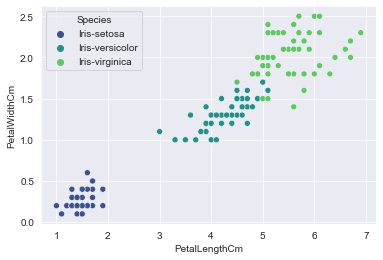

In [13]:
sns.set_style("darkgrid")
sns.scatterplot(iris['PetalLengthCm'],iris['PetalWidthCm'], hue= iris['Species'],palette='viridis')

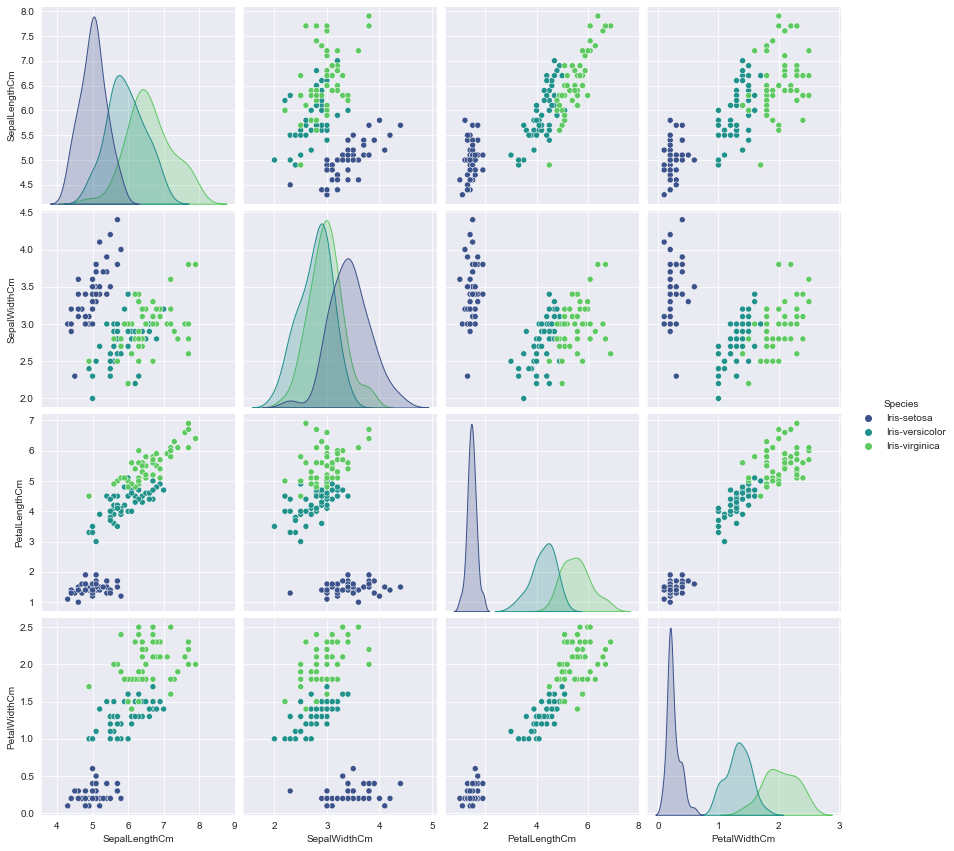

In [14]:
sns.pairplot(iris,hue="Species",size=3,palette="viridis")
plt.show()

<AxesSubplot:>

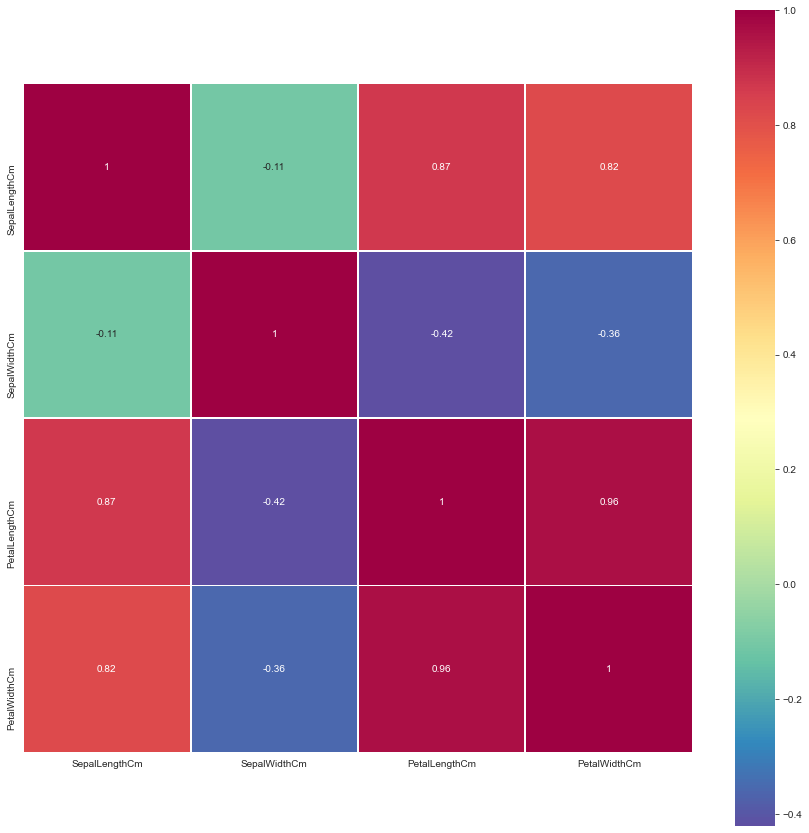

In [15]:
plt.subplots(figsize=(15,15))
sns.heatmap(iris.corr(),linewidths=1,annot=True,cmap="Spectral_r", square=True)

# Finding optimum no. of cluster (k) for K-means

In [16]:
features = iris.iloc[:, [0, 1, 2, 3]].values

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    
wcss

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.836345238095234,
 38.656917134717126,
 34.296638929588916,
 29.788370882190115,
 27.969508801383807,
 25.858146367521382]

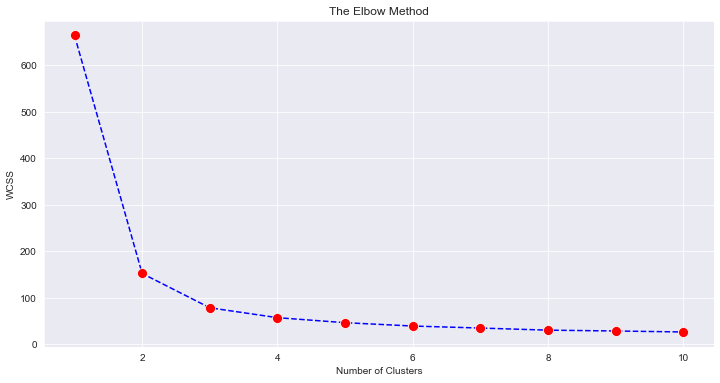

In [18]:
# Plotting the results onto a Line Graph
# Using the Elbow Graph, finding the optimum number of clusters

plt.figure(figsize=(12,6))
sns.lineplot(range(1, 11), wcss,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In the “elbow method”, the optimal clusters are formed where the elbow occurs. This is when the WCSS (Within Cluster Sum of Squares) doesn't decrease with every iteration significantly.
Hence, **the optimum value of k (.i.e. Number of clusters) is _3_.**

In [19]:
# Applying K-means to the dataset 
# Creating the K-means Classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 10)
y_kmeans = kmeans.fit_predict(features)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0])

## Visualizing the Clusters

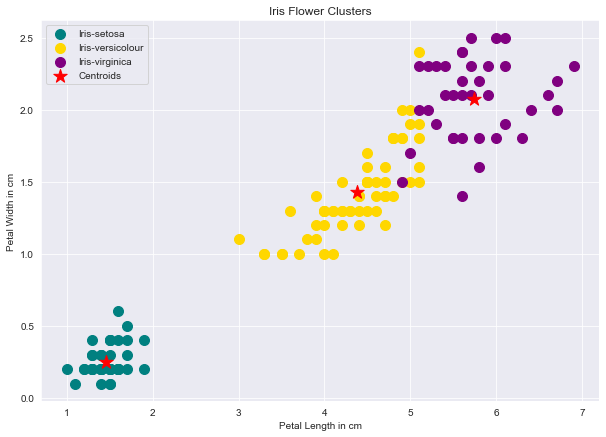

In [20]:
# Visualising the clusters - On the first two columns

fig = plt.figure(figsize=(10, 7)) 
plt.scatter(features[y_kmeans == 1, 2], features[y_kmeans == 1, 3], s = 100, c = 'teal', label = 'Iris-setosa')
plt.scatter(features[y_kmeans == 0, 2], features[y_kmeans == 0, 3], s = 100, c = 'gold', label = 'Iris-versicolour')
plt.scatter(features[y_kmeans == 2, 2], features[y_kmeans == 2, 3], s = 100, c = 'purple', label = 'Iris-virginica')

# Plotting the Centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 200,c = 'red',marker='*', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.show()